In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples = 2000, n_classes = 2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9816166666666667


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       ...,
       [0.98, 0.02],
       [0.98, 0.02],
       [0.24, 0.76]])

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


### Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### KNN Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


### Selecting the best threshold for maximum accuracy

In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850111111111111


In [13]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.60,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [15]:
final_prediction

0      0.882762
1      0.118323
2      0.821283
3      0.755353
4      0.567447
         ...   
595    0.123840
596    0.120345
597    0.879197
598    0.160717
599    0.832357
Length: 600, dtype: float64

In [16]:
#### Calculate the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91172166, 0.91172166, 0.9109413 , 0.91077475, 0.80631489,
       0.80412833, 0.79833537, 0.7980558 , 0.78630736, 0.78571156,
       0.75245214, 0.75037124, 0.71845844, 0.71637362, 0.71221721,
       0.70643711, 0.67351868, 0.67243537, 0.59745356, 0.59614346,
       0.58838469, 0.58550386, 0.57396627, 0.57175354, 0.56406376,
       0.55486186, 0.55095371, 0.54219563, 0.52865858, 0.49866892,
       0.4396034 , 0.41014281, 0.39629719, 0.36475652, 0.35836612,
       0.23904122, 0.23890421, 0.23119003, 0.22896893, 0.21039681,
       0.20348417, 0.11783548, 0.1178351 , 0.10648508])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.439603,0.961667
25,0.554862,0.960000
29,0.498669,0.958333
28,0.528659,0.958333
27,0.542196,0.958333


In [18]:
accuracy_ls

,thresholds,accuracy
30,0.439603,0.961667
25,0.554862,0.960000
29,0.498669,0.958333
28,0.528659,0.958333
27,0.542196,0.958333
26,0.550954,0.958333
24,0.564064,0.958333
23,0.571754,0.956667
22,0.573966,0.955000
31,0.410143,0.955000


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

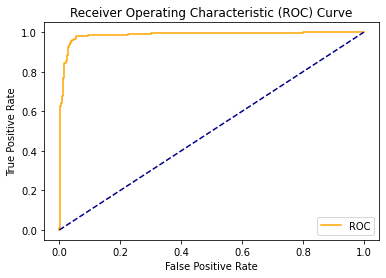

In [20]:
plot_roc_curve(fpr,tpr)